# <center><b> Capstone Project Group 1002</center></b>

# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
  
 
**2.** [**Problem Statement**](#Section2)<br>

**3.** [**Installing & Importing Libraries**](#Section3)<br>
  -  [**Installing Libraries**](#Section31)<br>
  -  [**Importing Libraries**](#Section32)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
  -  [**Data Acquisition**](#Section42)<br>
  -  [**Data Description**](#Section41)<br>


**5.** [**Examine the Data - Pre-Processing**](#Section5)<br>
  - [**Missing Value & Duplicate Value Treatment**](#Section52)<br>
  
**6.** [**Exploratory Data Analysis**](#Section6)<br>
 - [**Evaluation and Satisfaction Score**](#Section61)<br>
 - [**Department and Avg. Hours**](#Section62)<br>
 - [**Projects and Satisfaction Score**](#Section63)<br>
 - [**Pair Plot**](#Section64)<br>
 - [**Status Report**](#Section65)<br>
 - [**Correlation Matrix**](#Section65)<br>
 - [**Monthly Hrs and Satisfaction Report**](#Section65)<br>


**7.** [**Data Post-Processing**](#Section7)<br>
- [**XY Split**](#Section71)<br>
- [**Train Test Split**](#Section72)<br>


**8.** [**Modelling**](#Section8)<br>

 - [**One Hot Encoding and Scaling**](#Section81)<br>
 - [**Model Creation for Transformed Data**](#Section83)<br>
 - [**Random Forest Classifier Model**](#Section83)<br>
 - [**Decision Tree Classifier Model**](#Section84)<br>
 - [**Testing Model Accuracy**](#Section84)<br>

**9.** [**Conclusion**](#Section9)<br>

 



**Introduction**

**HR Department's New Initiative to Retain Employees**
- Our client for this project is the HR Department at a software company.
- HR wants to use the data to predict whether the employee will remain or leave the Organisation. They can proactivly reachout to emplyee and control
  the attrition.
- They only want to deal with the data that is related to permanent employees.

**Problem Statement**

   At the time of emplyee leaving, HR conduscts the **“exit interview”** and tries to gain insights from the interview and makes changes accordingly.Current process have following shortcomings -

- The quality of insight gained from an interview depends heavily on the skill of the interviewer.
- The insights can't be aggregated and interlaced across all employees who have left.
- By the time **exit-interview** completes, it is too late to propose policy changes to obtain the required benefits.

HR wants to develop the model to predict **if the employee will remain or leave**

# Installing and Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset Acquistion

In [56]:
# access the file to be analyzed and assign variable name
DT = pd.read_csv(filepath_or_buffer='employee_data.csv')
DT.shape # Examine the number of rows and columns in the dataframe

(14150, 11)

In [57]:
# Obtain column details including data type and size of the data frame
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [58]:
# access the file to be analyzed and assign variable name
EDD = pd.read_csv(filepath_or_buffer='employee_details_data.csv')
EDD.shape # Examine the number of rows and columns in the dataframe

(14245, 4)

In [59]:
# Obtain column details including data type and size of the data frame
EDD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [60]:
# access the file to be analyzed and assign variable name
DD = pd.read_csv(filepath_or_buffer='department_data.csv')
DD.shape # Examine the number of rows and columns in the dataframe

(11, 3)

In [44]:
# Obtain column details including data type and size of the data frame
DD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 396.0+ bytes



# **4. Data Acquisition & Description**

- The following is the description of the entire dataset.

</br>

- **Data description of 'employee_data' file as dataframe**

| Records | Features | Memory Usage |
| :-- | :-- | :-- |
| 14150  | 11 | 1.2MB |

|Index| Feature | Description
|:--|:--|:--|
|1|status (Target Variable)|Current employment status (Employed / Left)
|2|department|Department to which the employees belong(ed) to
|3|salary |Salary level with respect to rest of their department
|4|tenure|Number of years at the company.
|5|recently_promoted|Was the employee promoted in the last 3 years?
|6|employee_id |Unique ID Number for each employee
|7|n_projects|Number of projects employee has worked on
|8|avg_monthly_hrs|Average number of hours worked per month
|9|satisfaction |Score for employee’s satisfaction with the company (higher is better)
|10|last_evaluation|Score for most recent evaluation of employee (higher is better)
|11|filed_complaint|Has the employee filed a formal complaint in the last 3 years?


</br>

- **Data description of 'employee_details_data' file as dataframe**

| Records | Features | Memory Usage |
| :-- | :-- | :-- |
| 14245  | 4 | 445KB|

|Index| Feature | Description
|:--|:--|:--|
|1|employee_id|Unique ID Number for each employee
|2|age|Age of the employee
|3|gender|Gender of the employee
|4|marital_status|Marital Status of the employee


</br>

- **Data description of 'department_data' file as dataframe**

| Records | Features | Memory Usage |
| :-- | :-- | :-- |
| 11  | 3 | 396 Bytes |

|Index| Feature | Description
|:--|:--|:--|
|1|dept_id|Unique Department Code
|2|dept_name|Name of the Department
|3|dept_head|Name of the Head of the Department


5. **Examine the data - Data Preprocessing**


In [45]:
# Duplicate validation of 'employee_details_data' dataframe
EDD.loc[EDD.duplicated()]

Empty DataFrame
Columns: [employee_id, age, gender, marital_status]
Index: []

In [47]:
# Checking for null values
EDD.isnull().sum()

employee_id       0
age               0
gender            0
marital_status    0
dtype: int64

In [50]:
# Validating the top 5 rows of employee_details_data dataframe file
EDD.head()

employee_id  age  gender marital_status
0       113558   43    Male        Married
1       112256   24  Female      Unmarried
2       112586   22  Female      Unmarried
3       108071   36    Male        Married
4       116915   38    Male        Married

In [46]:
# Duplicate validation of 'department_data' dataframe
DD.loc[EDD.duplicated()]

Empty DataFrame
Columns: [dept_id, dept_name, dept_head]
Index: []

In [48]:
# Checking for null values
DD.isnull().sum()

dept_id      0
dept_name    0
dept_head    0
dtype: int64

In [51]:
# Validating the top 5 rows of Department_data dataframe file
DD.head()

dept_id    dept_name              dept_head
0   D00-IT           IT             Henry Adey
1   D00-SS        Sales        Edward J Bayley
2   D00-TP         Temp        Micheal Zachrey
3  D00-ENG  Engineering  Sushant Raghunathan K
4   D00-SP      Support         Amelia Westray

In [49]:
# Validating the top 5 rows of employee_data dataframe file
DT.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0        NaN              NaN         0.866838           6   
1            134.0        NaN              NaN         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              NaN         0.961360           6   
4            146.0     D00-SS              NaN         0.507349           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id  
0                NaN  medium      0.134415   Left     4.0       124467  
1                NaN     low      0.511041   Left     3.0       112210  
2                NaN  medium      0.405101   Left     3.0       126150  
3                NaN     low      0.152974   Left     4.0       125346  
4                NaN  medium      0.434845   Left     3.0       113707

In [7]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


**Observations**
- Dataset shape is **14150 * 11** with datatype of Int, Float and Object.
- Department datatype is Int


In [8]:
DT.describe()

avg_monthly_hrs  filed_complaint  last_evaluation    n_projects  \
count     14150.000000           2046.0     12663.000000  14150.000000   
mean        199.994346              1.0         0.718399      3.778304   
std          50.833697              0.0         0.173108      1.250162   
min          49.000000              1.0         0.316175      1.000000   
25%         155.000000              1.0         0.563711      3.000000   
50%         199.000000              1.0         0.724731      4.000000   
75%         245.000000              1.0         0.871409      5.000000   
max         310.000000              1.0         1.000000      7.000000   

       recently_promoted  satisfaction        tenure    employee_id  
count              297.0  14000.000000  14000.000000   14150.000000  
mean                 1.0      0.621212      3.499357  112080.750247  
std                  0.0      0.250482      1.462584    8748.202856  
min                  1.0      0.040058      2.000000       0.000000  
25%                  1.0      0.450356      3.000000  105772.500000  
50%                  1.0      0.652394      3.000000  111291.500000  
75%                  1.0      0.824925      4.000000  116650.750000  
max                  1.0      1.000000     10.000000  148988.000000

**Observations**
- Dataset has missing values in **filed_complaint, last_evaluation, recently_promoted,statisfaction,tenure,department**
- Dataset has outliers in **avg_montly_hrs**

##  Missing Value & Duplicat Value Treatment

In [9]:
## DT['employee_id']=DT['employee_id'].astype(object)

In [10]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [11]:
DT.shape[0]-DT.isnull().sum().sort_values(ascending = False)

recently_promoted      297
filed_complaint       2046
last_evaluation      12663
department           13443
satisfaction         14000
tenure               14000
avg_monthly_hrs      14150
n_projects           14150
salary               14150
status               14150
employee_id          14150
dtype: int64

In [12]:
DT.shape

(14150, 11)

In [13]:
DT.duplicated().sum()

29

In [14]:
DT = DT.drop_duplicates()

In [15]:
DT.shape

(14121, 11)

In [16]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14121 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14121 non-null  float64
 1   department         13414 non-null  object 
 2   filed_complaint    2041 non-null   float64
 3   last_evaluation    12634 non-null  float64
 4   n_projects         14121 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14121 non-null  object 
 7   satisfaction       13971 non-null  float64
 8   status             14121 non-null  object 
 9   tenure             13971 non-null  float64
 10  employee_id        14121 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.3+ MB


In [17]:
DT.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id'],
      dtype='object')

# Finding Out the Unique Value and Unique Count

In [18]:
for col in DT.columns:
    print(DT[col].value_counts())
    print('---')

avg_monthly_hrs
135.0    143
156.0    141
151.0    140
149.0    139
145.0    125
        ... 
75.0       1
71.0       1
56.0       1
65.0       1
88.0       1
Name: count, Length: 249, dtype: int64
---
department
D00-SS     3896
D00-ENG    2575
D00-SP     2109
D00-IT     1152
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: count, dtype: int64
---
filed_complaint
1.0    2041
Name: count, dtype: int64
---
last_evaluation
1.000000    356
0.896246      3
0.505883      3
0.990687      2
0.925602      2
           ... 
0.957656      1
0.738571      1
0.623016      1
0.668078      1
0.907277      1
Name: count, Length: 12188, dtype: int64
---
n_projects
4    4044
3    3788
5    2568
2    2323
6    1095
7     242
1      61
Name: count, dtype: int64
---
recently_promoted
1.0    297
Name: count, dtype: int64
---
salary
low       6893
medium    6087
high      1141
Name: count, dtype: int64
---
satisfaction
1.000

In [19]:
for col in DT.columns:
    print(DT[col].unique())
    print([col])
    print('---')

[246. 134. 156. 256. 146. 135. 270. 244. 289. 281. 269. 267. 257. 155.
 128. 274. 151. 127. 132. 309. 130. 233. 245. 149. 232. 284. 249. 164.
 159. 154. 239. 260. 125. 308. 306. 141. 143. 261. 301. 296. 271. 129.
 290. 225. 253. 255. 268. 153. 294. 293. 235. 158. 273. 277. 198. 160.
 131. 150. 254. 152. 236. 145. 279. 259. 297. 258. 140. 223. 147. 148.
 310. 137. 303. 202. 136. 287. 218. 172. 305. 291. 243. 228. 283. 242.
 192. 298. 285. 247. 216. 280. 265. 263. 276. 139. 142. 299. 278. 282.
 241. 144. 157. 264. 138. 224. 251. 124. 119. 248. 304. 262. 266. 133.
 252. 275. 219. 307. 226. 214. 180. 300. 240. 217. 227. 238. 177. 181.
 165. 288. 286. 272. 250. 126. 292.  65. 222. 229. 302. 237. 161. 295.
 221.  63. 195. 213. 234. 205. 212. 179.  72.  87. 163. 169. 231. 166.
 220.  68. 196. 162. 182. 204. 184.  74.  67. 206. 183. 189. 168. 178.
 211. 176. 194. 173. 185. 215. 186. 207. 191. 203. 108. 101. 120. 174.
 197. 193. 230. 111. 201. 115. 209. 170.  69. 187. 109. 175.  99. 190.
 112. 

## Observations
- Employee ID 0- 5 Times,Duplicated  (109804,108265 ,109085 ,115325).
- Department -IT can be replaced with D00-IT, Missing Can be replace with Others
-  Missing Value in filled complaint, recently promoted,tenure,

# Filling Missing Values and Replacing incorrect Data

In [20]:
DT['tenure'] = DT['tenure'].fillna(DT['tenure'].median())
DT['satisfaction'] = DT['satisfaction'].fillna(DT['satisfaction'].median())
DT['last_evaluation'] = DT['last_evaluation'].fillna(DT['last_evaluation'].median())
DT['recently_promoted']= DT['recently_promoted'].fillna(0)
DT['filed_complaint'] = DT['filed_complaint'].fillna(0)
DT['department'] = DT['department'].replace('-IT','D00-IT')
DT['department'] = DT['department'].fillna('Others')

In [21]:
DT['department'].unique()

array(['Others', 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT',
       'D00-AD', 'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN'],
      dtype=object)

In [22]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14121 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14121 non-null  float64
 1   department         14121 non-null  object 
 2   filed_complaint    14121 non-null  float64
 3   last_evaluation    14121 non-null  float64
 4   n_projects         14121 non-null  int64  
 5   recently_promoted  14121 non-null  float64
 6   salary             14121 non-null  object 
 7   satisfaction       14121 non-null  float64
 8   status             14121 non-null  object 
 9   tenure             14121 non-null  float64
 10  employee_id        14121 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.3+ MB


# Find Employee ID - Duplicate                                                    


In [23]:
DT['employee_id'].duplicated().sum()

4

In [24]:
DT = DT.drop_duplicates(subset=['employee_id'])

In [25]:
DT.shape

(14117, 11)

In [26]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14117 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14117 non-null  float64
 1   department         14117 non-null  object 
 2   filed_complaint    14117 non-null  float64
 3   last_evaluation    14117 non-null  float64
 4   n_projects         14117 non-null  int64  
 5   recently_promoted  14117 non-null  float64
 6   salary             14117 non-null  object 
 7   satisfaction       14117 non-null  float64
 8   status             14117 non-null  object 
 9   tenure             14117 non-null  float64
 10  employee_id        14117 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.3+ MB


In [27]:
for col in DT.columns:
    print([col])
    print(DT[col].unique())    
    print('---')

['avg_monthly_hrs']
[246. 134. 156. 256. 146. 135. 270. 244. 289. 281. 269. 267. 257. 155.
 128. 274. 151. 127. 132. 309. 130. 233. 245. 149. 232. 284. 249. 164.
 159. 154. 239. 260. 125. 308. 306. 141. 143. 261. 301. 296. 271. 129.
 290. 225. 253. 255. 268. 153. 294. 293. 235. 158. 273. 277. 198. 160.
 131. 150. 254. 152. 236. 145. 279. 259. 297. 258. 140. 223. 147. 148.
 310. 137. 303. 202. 136. 287. 218. 172. 305. 291. 243. 228. 283. 242.
 192. 298. 285. 247. 216. 280. 265. 263. 276. 139. 142. 299. 278. 282.
 241. 144. 157. 264. 138. 224. 251. 124. 119. 248. 304. 262. 266. 133.
 252. 275. 219. 307. 226. 214. 180. 300. 240. 217. 227. 238. 177. 181.
 165. 288. 286. 272. 250. 126. 292.  65. 222. 229. 302. 237. 161. 295.
 221.  63. 195. 213. 234. 205. 212. 179.  72.  87. 163. 169. 231. 166.
 220.  68. 196. 162. 182. 204. 184.  74.  67. 206. 183. 189. 168. 178.
 211. 176. 194. 173. 185. 215. 186. 207. 191. 203. 108. 101. 120. 174.
 197. 193. 230. 111. 201. 115. 209. 170.  69. 187. 109. 1

# Observation
- After Removing duplicated and treating the data, now the data shape is **14117, 11**
- All the data is corrected

# Exploratory Data Analysis

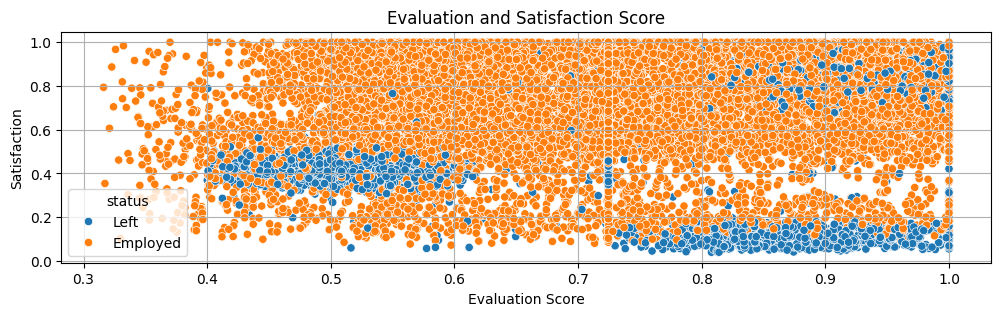

In [28]:
plt.figure(figsize=(12,3))
plt.title('Evaluation and Satisfaction Score')
sns.scatterplot(data=DT,x='last_evaluation',y='satisfaction',hue = 'status')
plt.xlabel('Evaluation Score',size =10)
plt.ylabel('Satisfaction')
plt.grid()
plt.show()


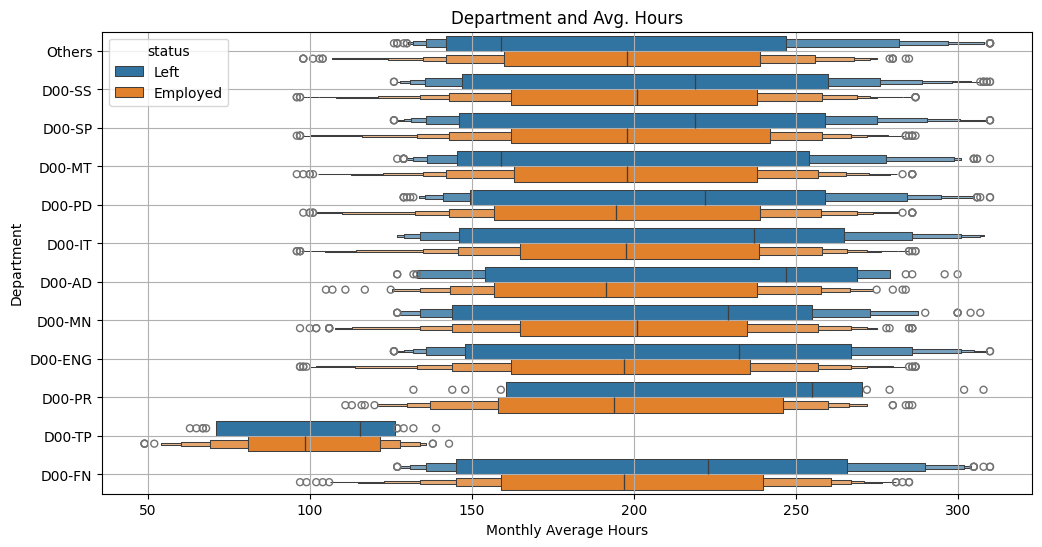

In [29]:
plt.figure(figsize=(12,6))
plt.title('Department and Avg. Hours')
sns.boxenplot(data = DT,x='avg_monthly_hrs',y='department',hue = 'status')
plt.xlabel('Monthly Average Hours',size =10)
plt.ylabel('Department')
plt.grid()
plt.show()



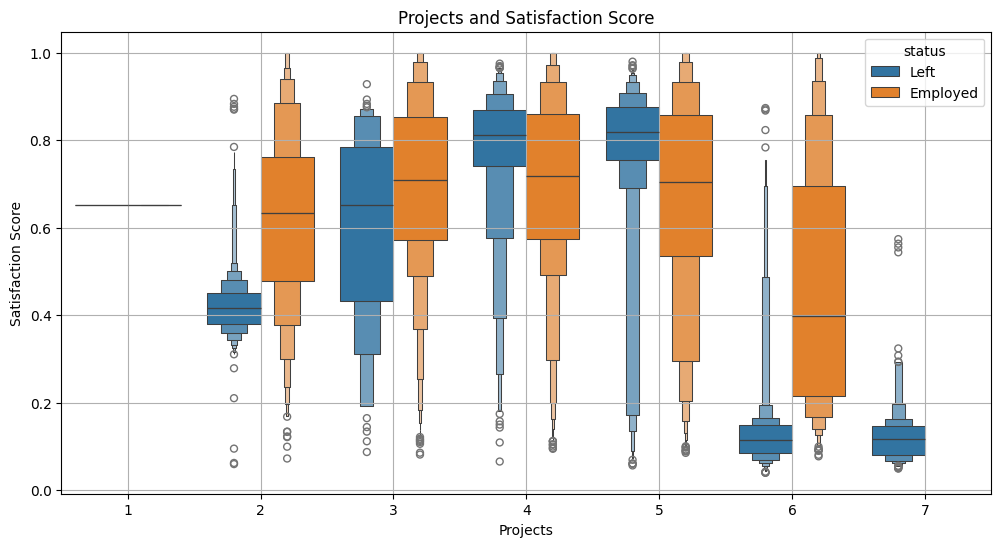

In [30]:
plt.figure(figsize=(12,6))
plt.title('Projects and Satisfaction Score')
sns.boxenplot(data=DT,x='n_projects',y='satisfaction',hue = 'status')
plt.xlabel('Projects',size =10)
plt.ylabel('Satisfaction Score')
plt.grid()
plt.show()


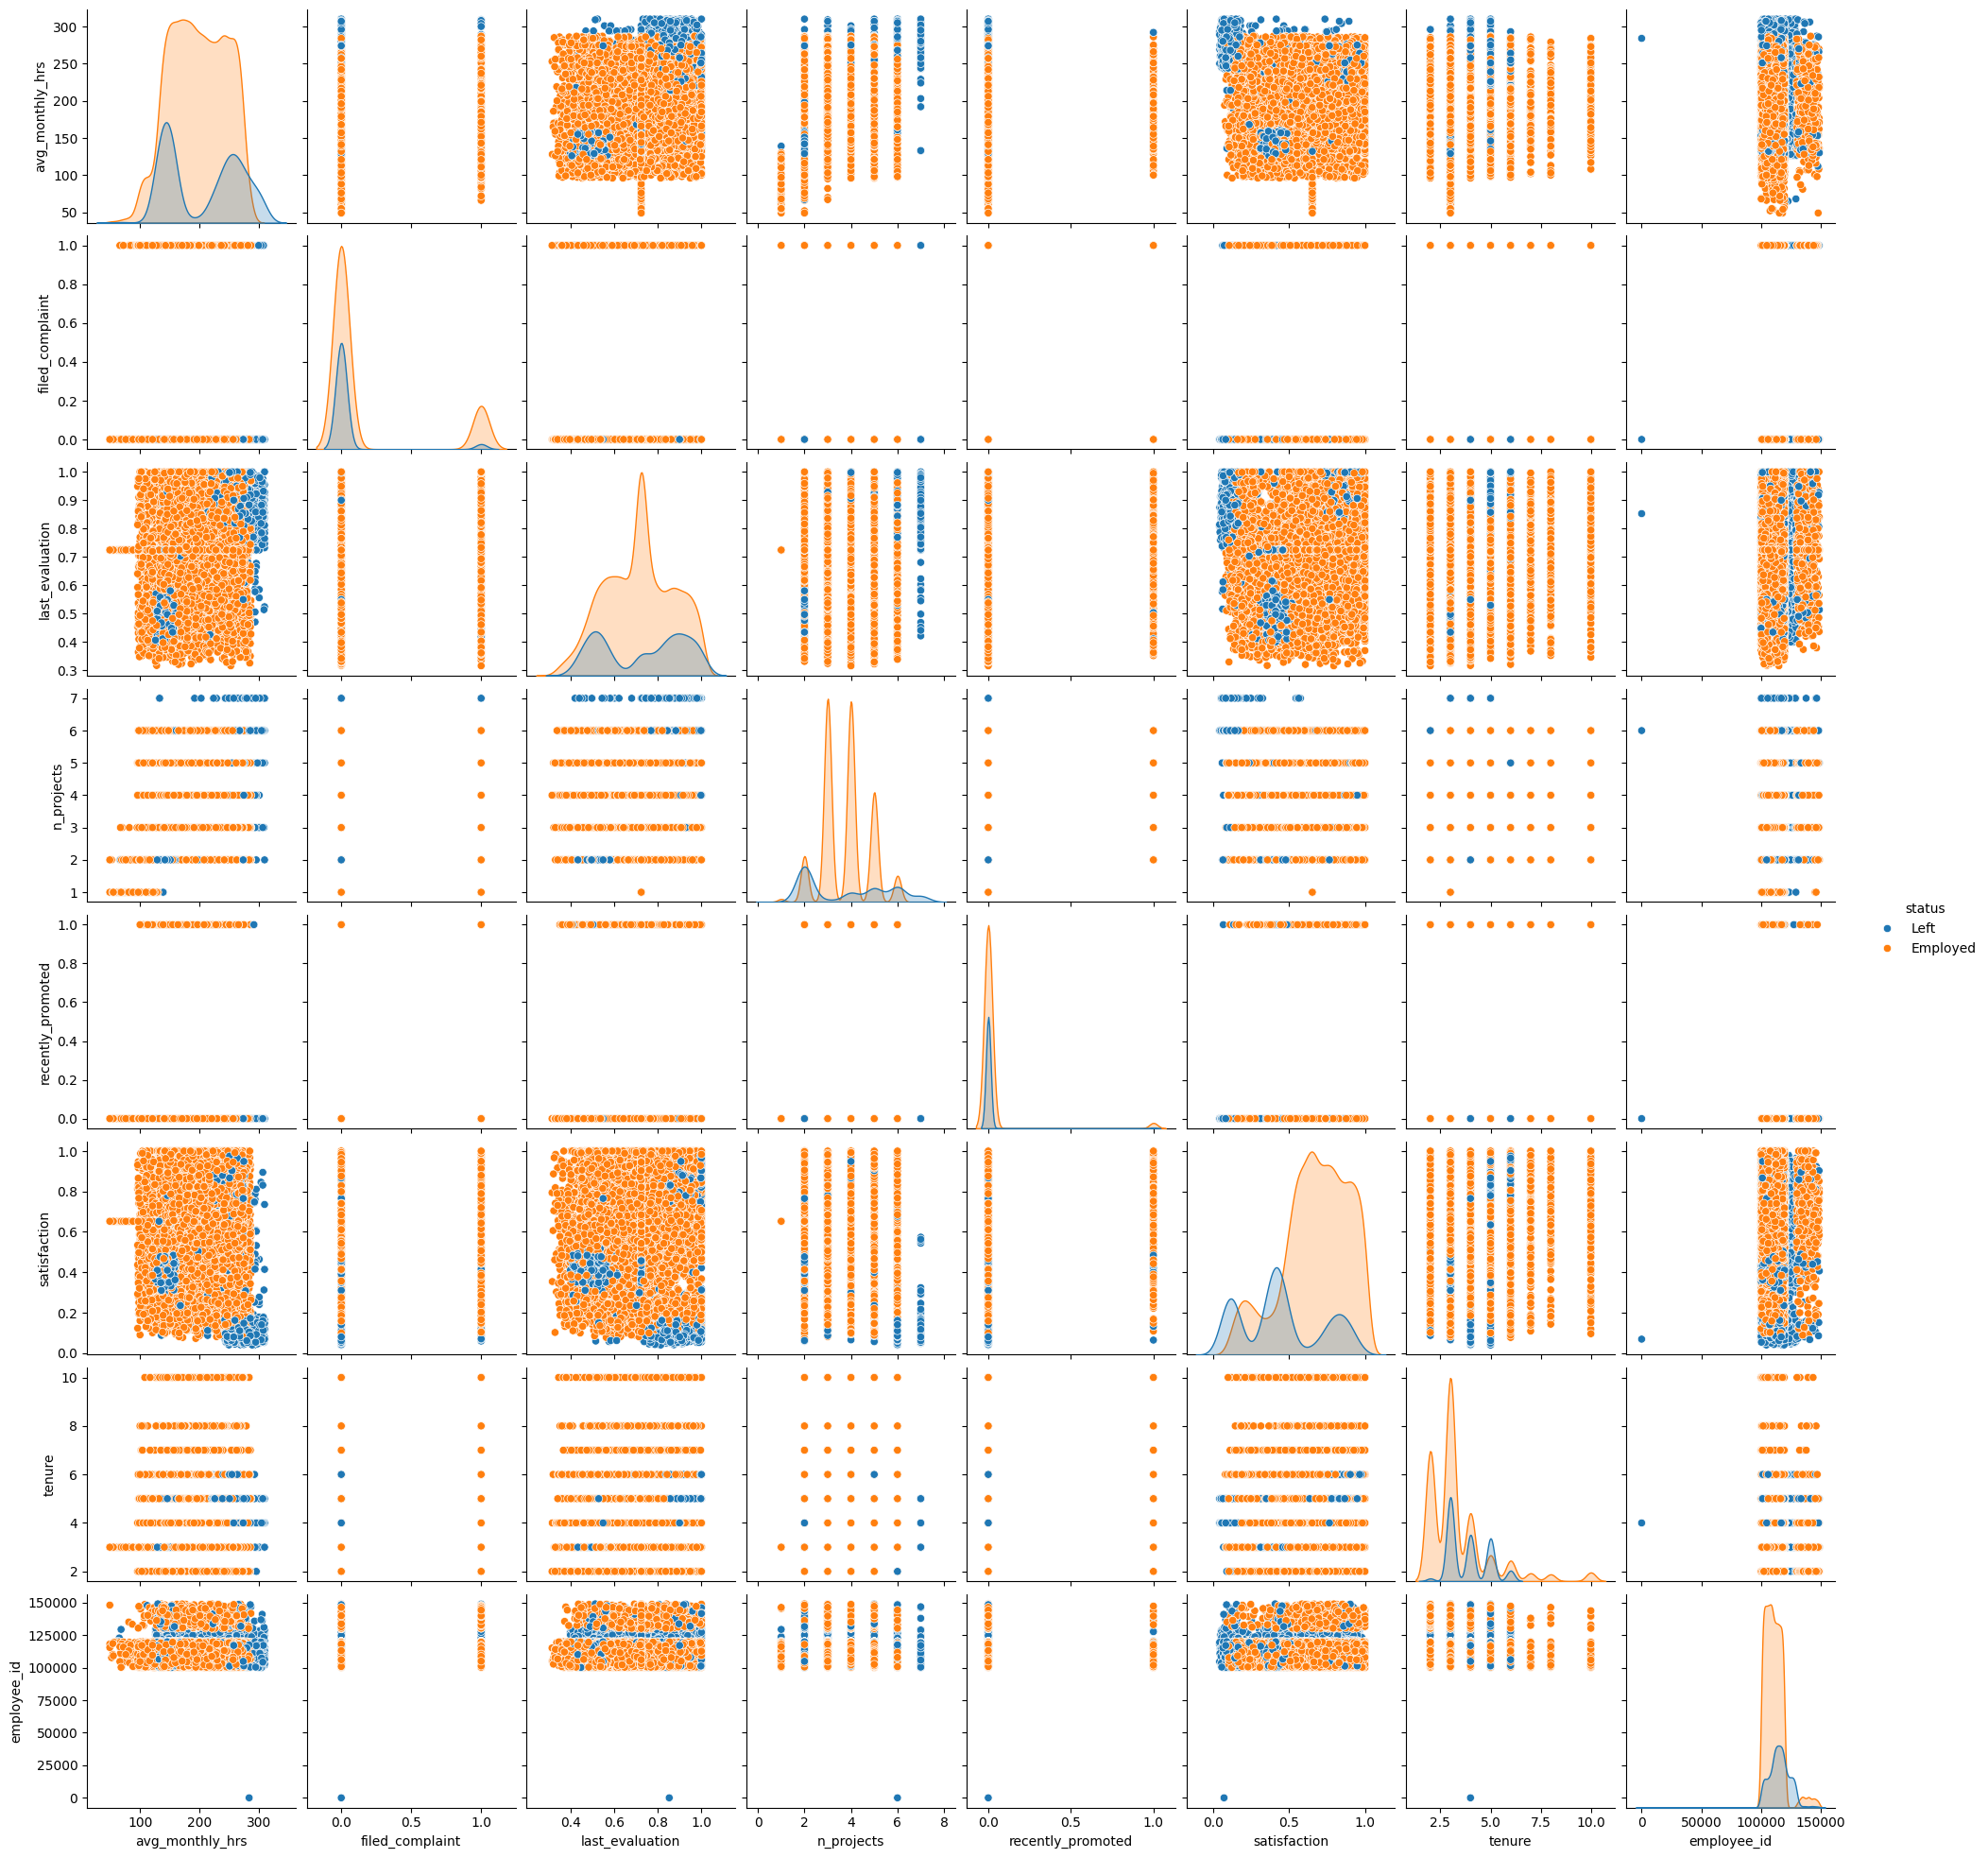

In [31]:
sns.pairplot(data = DT, hue='status')
plt.show()


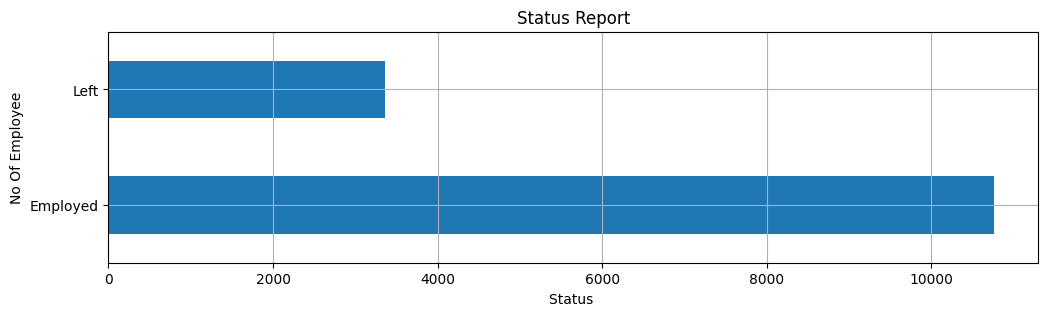

In [32]:
plt.figure(figsize=(12,3))
plt.title('Status Report')
DT['status'].value_counts().plot.barh()
plt.xlabel('Status ',size =10)
plt.ylabel('No Of Employee')
plt.grid()
plt.show()


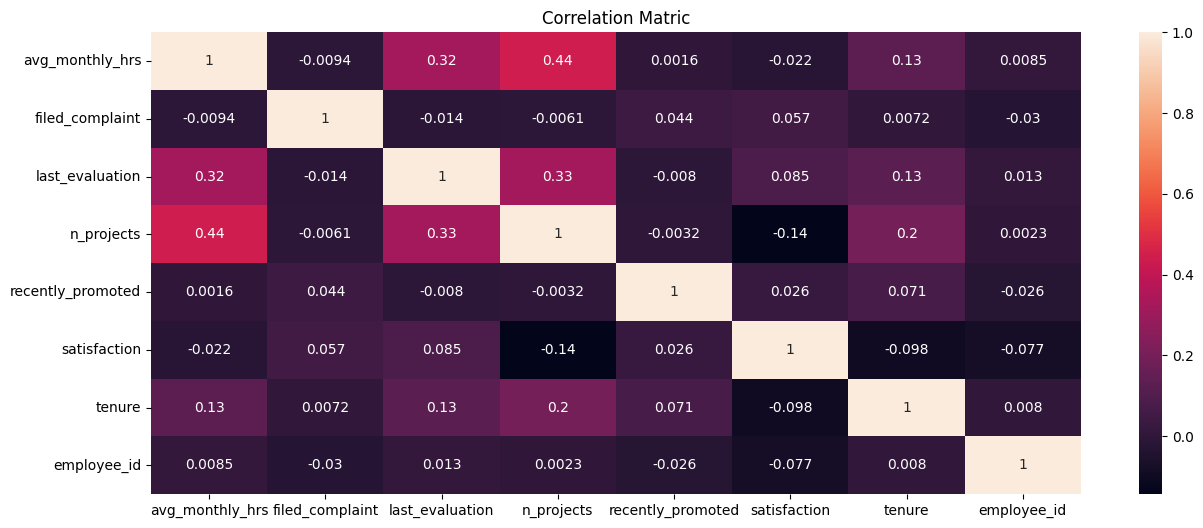

In [33]:
plt.figure(figsize = [15,6])
sns.heatmap(DT.select_dtypes(exclude = 'object').corr(), annot = True)
plt.title("Correlation Matric")
plt.show()

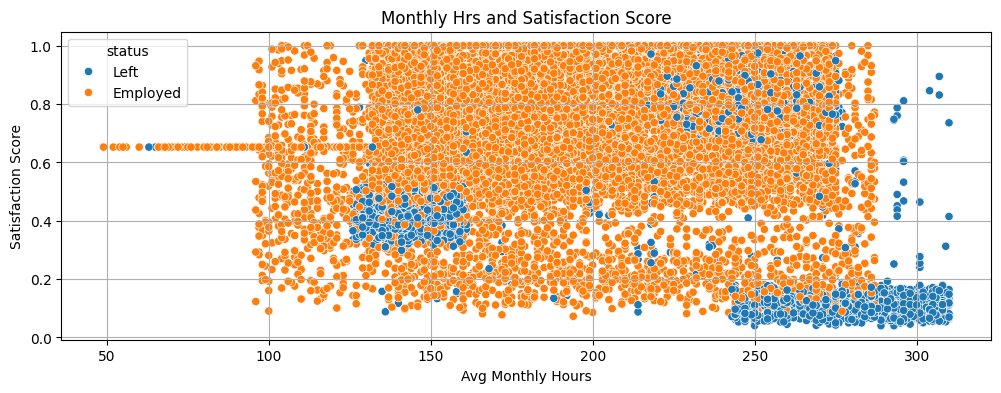

In [34]:
plt.figure(figsize=(12,4))
plt.title('Monthly Hrs and Satisfaction Score')
sns.scatterplot(data=DT,x='avg_monthly_hrs',y='satisfaction',hue = 'status')
plt.xlabel('Avg Monthly Hours',size =10)
plt.ylabel('Satisfaction Score')
plt.grid()
plt.show()



**Observations**
- Employee with **Low Satisfaction Score** left organistation  even if there recent evalution score was **higer** also Employee with **Lower Score** left organistion even if they have **More Satisfaction** Score.
- Employee with **Higher Monthly Working Hours** have lesser **Satisfaction** and they **Left** the organisation.
- Employee have done from **Minimum 2** to **Maximum 7** Projects. Employee with **More Project** have higher chances for Retention

# 7.Data Post-Processing 

In [36]:
DT.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id'],
      dtype='object')

In [37]:
df=DT.copy()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14117 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14117 non-null  float64
 1   department         14117 non-null  object 
 2   filed_complaint    14117 non-null  float64
 3   last_evaluation    14117 non-null  float64
 4   n_projects         14117 non-null  int64  
 5   recently_promoted  14117 non-null  float64
 6   salary             14117 non-null  object 
 7   satisfaction       14117 non-null  float64
 8   status             14117 non-null  object 
 9   tenure             14117 non-null  float64
 10  employee_id        14117 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.3+ MB


In [39]:
df.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0     Others              0.0         0.866838           6   
1            134.0     Others              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id  
0                0.0  medium      0.134415   Left     4.0       124467  
1                0.0     low      0.511041   Left     3.0       112210  
2                0.0  medium      0.405101   Left     3.0       126150  
3                0.0     low      0.152974   Left     4.0       125346  
4                0.0  medium      0.434845   Left     3.0       113707

## XY Split

In [40]:
Y=df['status']
X=df.drop('status',axis =1)

## Train - Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [42]:
X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_cont = X_train.select_dtypes(exclude = ['object'])

In [43]:
X_test_cat = X_test.select_dtypes(include = ['object'])
X_test_cont = X_test.select_dtypes(exclude = ['object'])

# Modelling 

## One Hot Encoding and Scaling 

In [44]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop = 'first', sparse_output = False)
encoder.fit(X_train_cat,X_test_cat)

OneHotEncoder(drop='first', sparse_output=False)

In [45]:
X_train_cat_ohe = pd.DataFrame(encoder.transform(X_train_cat), 
                               columns = encoder.get_feature_names_out(), 
                               index = X_train_cat.index)

X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns = encoder.get_feature_names_out(), 
                               index = X_test_cat.index)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_cont)

StandardScaler()

In [47]:
X_train_cont_S = pd.DataFrame(scaler.transform(X_train_cont), 
                              columns = X_train_cont.columns + '_S', 
                              index = X_train_cont.index)

X_test_cont_S = pd.DataFrame(scaler.transform(X_test_cont), 
                              columns = X_test_cont.columns + '_S', 
                              index = X_test_cont.index)

#  Model Creation for Transformed Data

In [48]:
X_train_comb = pd.concat([X_train_cat_ohe, X_train_cont_S], axis = 1)
X_test_comb = pd.concat([X_test_cat_ohe, X_test_cont_S], axis = 1)

In [49]:
X_train_comb.head()

department_D00-ENG  department_D00-FN  department_D00-IT  \
468                   0.0                0.0                0.0   
2371                  0.0                0.0                0.0   
11470                 1.0                0.0                0.0   
1433                  1.0                0.0                0.0   
13792                 0.0                0.0                0.0   

       department_D00-MN  department_D00-MT  department_D00-PD  \
468                  0.0                0.0                0.0   
2371                 1.0                0.0                0.0   
11470                0.0                0.0                0.0   
1433                 0.0                0.0                0.0   
13792                0.0                0.0                0.0   

       department_D00-PR  department_D00-SP  department_D00-SS  \
468                  0.0                0.0                0.0   
2371                 0.0                0.0                0.0   
11470                0.0                0.0                0.0   
1433                 0.0                0.0                0.0   
13792                0.0                0.0                1.0   

       department_D00-TP  ...  salary_low  salary_medium  avg_monthly_hrs_S  \
468                  1.0  ...         0.0            0.0          -2.657719   
2371                 0.0  ...         1.0            0.0           0.314956   
11470                0.0  ...         1.0            0.0           0.295269   
1433                 0.0  ...         1.0            0.0          -1.319031   
13792                0.0  ...         0.0            1.0           0.492135   

       filed_complaint_S  last_evaluation_S  n_projects_S  \
468            -0.413065           0.036057     -2.230476   
2371           -0.413065          -0.903173      0.174103   
11470          -0.413065           0.266902      0.975629   
1433           -0.413065           1.025914      2.578682   
13792          -0.413065          -0.179703      0.975629   

       recently_promoted_S  satisfaction_S  tenure_S  employee_id_S  
468              -0.142579        0.121381 -0.340653       1.237981  
2371             -0.142579        1.460651 -0.340653      -1.252508  
11470            -0.142579       -1.667941  0.343866       0.200831  
1433             -0.142579       -1.323291  1.028385       0.378931  
13792            -0.142579        0.278496  2.397422      -1.273008  

[5 rows x 21 columns]

# Random Forest Classifier Model

In [50]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(n_estimators=100)
RF.fit(X_train_comb,Y_train)


RandomForestClassifier()

In [51]:
y_test_pred_count1 = RF.predict(X_test_comb)

In [52]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,y_test_pred_count1)
print(accuracy)

0.9808781869688386


# Decision Tree Classifier Model

In [53]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier(max_depth=2)
DT.fit(X_train_comb,Y_train)

DecisionTreeClassifier(max_depth=2)

In [54]:
y_test_pred_DT = DT.predict(X_test_comb)

# Testing Model Accuracy

In [55]:
from sklearn.metrics import accuracy_score
accuracy_DT = accuracy_score(Y_test,y_test_pred_count1)
print(accuracy_DT)

0.9808781869688386


# Feature Importance

In [56]:
features = X_train_comb.columns
importances = RF.feature_importances_
indices = np.argsort(importances)



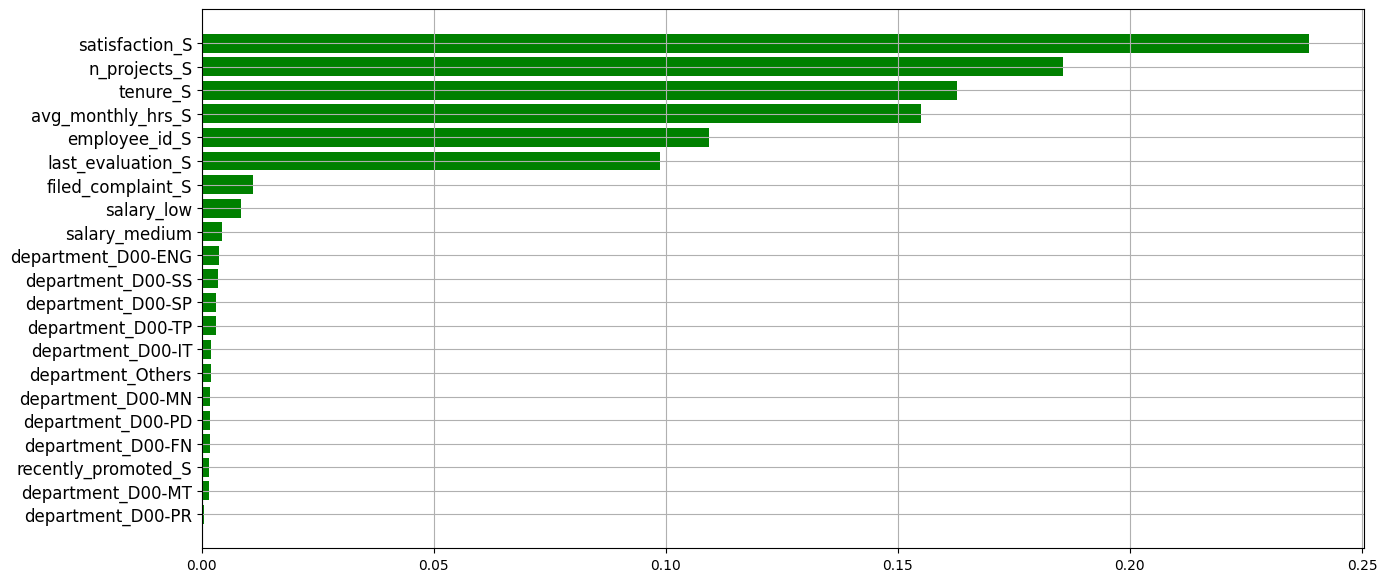

In [57]:
plt.figure(figsize=[15, 7])
plt.barh(y=range(len(indices)), width=importances[indices], color='g', align='center')
plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices], size=12)
plt.grid(True)
plt.show()

# Conclusion

- We studied the areas and we can conclude that the major factors for deciding if employee will remain or go are **Satisfaction** , **Number of Projects** , **Avg Monthly Hrs**, **Tenure** and **Evaluation Score**

In [58]:
indices 

array([ 6,  4, 17,  1,  5,  3, 10,  2,  9,  7,  8,  0, 12, 11, 14, 15, 20,
       13, 19, 16, 18], dtype=int64)